In [2]:
# 전처리

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print('cuda index:', torch.cuda.current_device())

print('gpu 개수:', torch.cuda.device_count())

print('graphic name:', torch.cuda.get_device_name())

cuda = torch.device('cuda')
device = torch.device('cuda')

print(cuda)

cuda index: 0
gpu 개수: 1
graphic name: NVIDIA GeForce RTX 3070 Ti
cuda


horse  bird  frog horse


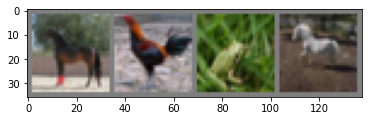

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
# Device Setup

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("학습을 진행하는 기기 : ",device)

학습을 진행하는 기기 :  cuda


In [7]:
# CNN 정의

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        self.classifier = nn.Linear(16, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        features = x
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, features


net = Net()

In [11]:
# CNN 정의

class AddOneLayerNet(nn.Module):
    def __init__(self):
        super(AddOneLayerNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(16, 32, 3, stride = 1, padding = 1)
        self.fc1 = nn.Linear(32 * 4 * 4, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        self.classifier = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        features = x
        x = x.view(-1, 32 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, features


net = AddOneLayerNet()

In [21]:
# CNN 정의

class AddTwoLayerNet(nn.Module):
    def __init__(self):
        super(AddTwoLayerNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(16, 32, 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(32, 64, 3, stride = 1, padding = 1)
        self.fc1 = nn.Linear(64 * 4 * 4, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        self.classifier = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        features = x
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, features


net = AddTwoLayerNet()

In [27]:
# CNN 정의

class AddThreeLayerNet(nn.Module):
    def __init__(self):
        super(AddThreeLayerNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(16, 32, 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(32, 64, 3, stride = 1, padding = 1)
        self.conv5 = nn.Conv2d(64, 128, 3, stride = 1, padding = 1)
        self.fc1 = nn.Linear(128 * 4 * 4, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        self.classifier = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv5(x)))
        features = x
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, features


net = AddThreeLayerNet()

In [39]:
# CNN 정의

class AddDropoutLayerNet(nn.Module):
    def __init__(self):
        super(AddDropoutLayerNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(16, 32, 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(32, 64, 3, stride = 1, padding = 1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64 * 4 * 4, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        self.classifier = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.dropout(x)
        features = x
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, features


net = AddDropoutLayerNet()

In [120]:
# CNN 정의

class NormalLayerNet(nn.Module):
    def __init__(self):
        super(NormalLayerNet, self).__init__()
        self.conv00 = nn.Conv2d(3, 8, 3, stride = 1, padding = 1)
        self.conv01 = nn.Conv2d(8, 16, 3, stride = 1, padding = 1)
        self.conv02 = nn.Conv2d(16, 32, 3, stride = 1, padding = 1)
        
        self.conv1 = nn.Conv2d(32, 64, 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(128, 256, 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(256, 512, 3, stride = 1, padding = 1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512 * 4 * 4, 600)
        self.fc2 = nn.Linear(600, 240)
        self.fc3 = nn.Linear(240, 84)
        self.fc4 = nn.Linear(84, 10)
        self.classifier = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv00(x))
        x = F.relu(self.conv01(x))
        x = F.relu(self.conv02(x))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        features = x
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.dropout(x)
        x = x.view(-1, 512 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, features


net = NormalLayerNet()

In [126]:
# CNN 정의

class AddAlphaLayerNet(nn.Module):
    def __init__(self):
        super(AddAlphaLayerNet, self).__init__()
        self.conv11 = nn.Conv2d(3, 32, 1)
        
        self.conv00 = nn.Conv2d(3, 8, 3, stride = 1, padding = 1)
        self.conv01 = nn.Conv2d(8, 16, 3, stride = 1, padding = 1)
        self.conv02 = nn.Conv2d(16, 32, 3, stride = 1, padding = 1)
        
        self.conv1 = nn.Conv2d(32, 64, 3, stride = 1, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(128, 256, 3, stride = 1, padding = 1)
        self.conv4 = nn.Conv2d(256, 512, 3, stride = 1, padding = 1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512 * 4 * 4, 600)
        self.fc2 = nn.Linear(600, 240)
        self.fc3 = nn.Linear(240, 84)
        self.fc4 = nn.Linear(84, 10)
        self.classifier = nn.Linear(512, 10)

    def forward(self, x):
        y = F.relu(self.conv11(x))
        x = F.relu(self.conv00(x))
        x = F.relu(self.conv01(x))
        x = F.relu(self.conv02(x))
        x = x+y
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        features = x
        
        x = self.dropout(x)
        
        x = x.view(-1, 512 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, features


net = AddAlphaLayerNet()

In [127]:
# Optimizer Criterion
import torch.optim as optim
net = net.to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [128]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)[0]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.681
[1,  4000] loss: 2.338
[1,  6000] loss: 2.100
[1,  8000] loss: 1.950
[1, 10000] loss: 1.808
[1, 12000] loss: 1.678
[2,  2000] loss: 1.566
[2,  4000] loss: 1.467
[2,  6000] loss: 1.395
[2,  8000] loss: 1.313
[2, 10000] loss: 1.238
[2, 12000] loss: 1.170
[3,  2000] loss: 1.071
[3,  4000] loss: 1.032
[3,  6000] loss: 0.995
[3,  8000] loss: 0.946
[3, 10000] loss: 0.900
[3, 12000] loss: 0.894
[4,  2000] loss: 0.788
[4,  4000] loss: 0.769
[4,  6000] loss: 0.756
[4,  8000] loss: 0.744
[4, 10000] loss: 0.719
[4, 12000] loss: 0.725
[5,  2000] loss: 0.610
[5,  4000] loss: 0.629
[5,  6000] loss: 0.628
[5,  8000] loss: 0.610
[5, 10000] loss: 0.631
[5, 12000] loss: 0.597
[6,  2000] loss: 0.502
[6,  4000] loss: 0.518
[6,  6000] loss: 0.514
[6,  8000] loss: 0.527
[6, 10000] loss: 0.497
[6, 12000] loss: 0.513
[7,  2000] loss: 0.405
[7,  4000] loss: 0.411
[7,  6000] loss: 0.433
[7,  8000] loss: 0.423
[7, 10000] loss: 0.446
[7, 12000] loss: 0.454
[8,  2000] loss: 0.316
[8,  4000] 

In [122]:
# Test the Model

def test():
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = net(images)[0]
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print("Accuracy of the network on the 10,000 test images: %d %%" %(100 * correct/total))

In [123]:
torch.save(net.state_dict(), 'cifar.pkl')

In [10]:
#BasicLayerNet - 20Epoch
test()

Accuracy of the network on the 10,000 test images: 60 %


In [16]:
#AddOneLayerNet - 20Epoch
test()

Accuracy of the network on the 10,000 test images: 64 %


In [26]:
#AddTwoLayerNet - 20Epoch
test()

Accuracy of the network on the 10,000 test images: 66 %


In [32]:
#AddThreeLayerNet - 20Epoch
test()

Accuracy of the network on the 10,000 test images: 62 %


In [44]:
#AddDropoutLayerNet - 20Epoch
test()

Accuracy of the network on the 10,000 test images: 65 %


In [117]:
#NormalLayerNet - 20Epoch
test()

Accuracy of the network on the 10,000 test images: 78 %


In [13]:
#AddAlphaLayerNet - 20Epoch
test()

Accuracy of the network on the 10,000 test images: 79 %


torch.Size([8, 32, 32])
torch.Size([16, 32, 32])


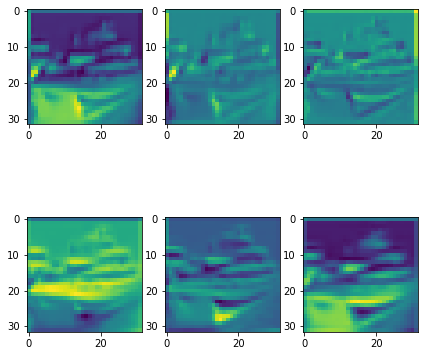

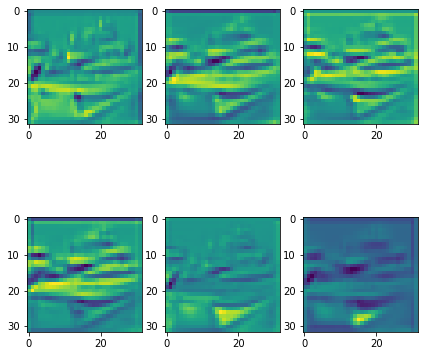

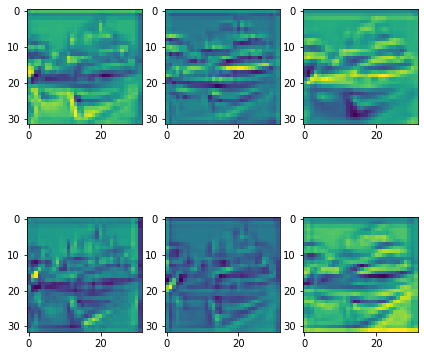

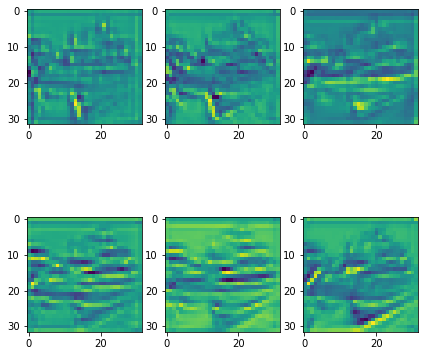

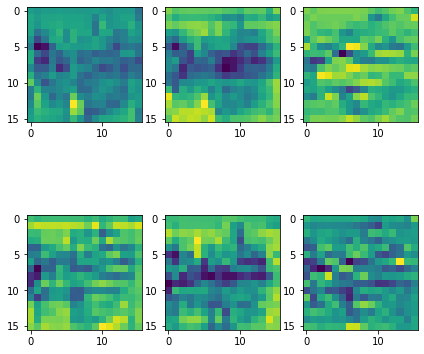

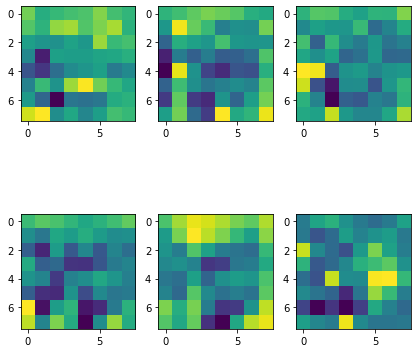

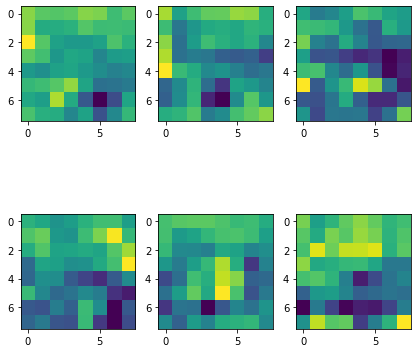

In [118]:
# Intermediate Feature Space - AddAlphaLayer

activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    
    return hook
net.conv00.register_forward_hook(get_activation('conv00'))
net.conv01.register_forward_hook(get_activation('conv01'))
net.conv02.register_forward_hook(get_activation('conv02'))
net.conv1.register_forward_hook(get_activation('conv1'))
net.conv2.register_forward_hook(get_activation('conv2'))
net.conv3.register_forward_hook(get_activation('conv3'))
net.conv4.register_forward_hook(get_activation('conv4'))


data, _ = testset[1]
data.unsqueeze_(0)
output = net(data.to(device))[0]


act = activation['conv00'].squeeze()
act2 = activation['conv01'].squeeze()
act3 = activation['conv02'].squeeze()
act4 = activation['conv1'].squeeze()
act5 = activation['conv2'].squeeze()
act6 = activation['conv3'].squeeze()
act7 = activation['conv4'].squeeze()

print(act.shape)
print(act2.shape)


row, col = 2, 3

fig, axarr = plt.subplots(row, col, figsize=(7, 7))

for i in range(row):
    for j in range(col):
        axarr[i][j].imshow(act[i*col+j].cpu())
        
row, col = 2,3
        
fig2, axarr2 = plt.subplots(row, col, figsize=(7, 7))
for i in range(row):
    for j in range(col):
        axarr2[i][j].imshow(act2[i*col+j].cpu())
        
row, col = 2, 3

fig, axarr = plt.subplots(row, col, figsize=(7, 7))

for i in range(row):
    for j in range(col):
        axarr[i][j].imshow(act3[i*col+j].cpu())
        
row, col = 2, 3
        
fig2, axarr2 = plt.subplots(row, col, figsize=(7, 7))
for i in range(row):
    for j in range(col):
        axarr2[i][j].imshow(act4[i*col+j].cpu())
        
row, col = 2, 3

fig, axarr = plt.subplots(row, col, figsize=(7, 7))

for i in range(row):
    for j in range(col):
        axarr[i][j].imshow(act5[i*col+j].cpu())
        
row, col = 2, 3
        
fig2, axarr2 = plt.subplots(row, col, figsize=(7, 7))
for i in range(row):
    for j in range(col):
        axarr2[i][j].imshow(act6[i*col+j].cpu())
        
row, col = 2, 3

fig, axarr = plt.subplots(row, col, figsize=(7, 7))

for i in range(row):
    for j in range(col):
        axarr[i][j].imshow(act7[i*col+j].cpu())
        
        

torch.Size([1, 128, 8, 8])


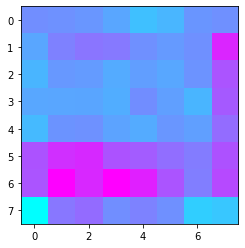

In [124]:
# CAM
image, label = testset[1]
batch_img = image[None, :, :, :].to(device)

x, map = net(batch_img)

print(map.shape)

class_weight = net.classifier.weight[int(label)].unsqueeze(-1).unsqueeze(-1)
cam_ = torch.squeeze(map) * class_weight

cam = torch.sum(cam_, axis=0)
cam = cam.detach().cpu().numpy()

plt.imshow(cam, cmap="cool", interpolation="nearest")
plt.show()

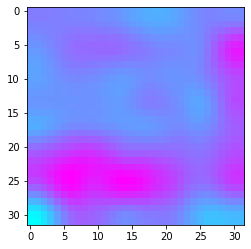

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


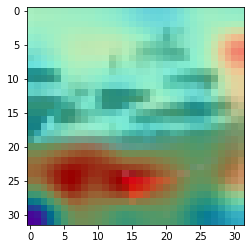

In [125]:
import cv2

resize_cam = cv2.resize(cam, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
plt.imshow(resize_cam, cmap="cool", interpolation="nearest")
plt.show()

imshow(image)

origin = image.detach().numpy()

plt.imshow(np.rollaxis(origin, 0, 3))
plt.imshow(resize_cam, alpha=0.6, cmap="rainbow")
plt.show()

In [28]:
# feature space와 그에 대응하는 label space 추출

feature_space = torch.Tensor()
label_space = torch.Tensor()
print(feature_space)
print(label_space)
for i in range(0, 1000):
    image, label = testset[i]
    batch_img = image[None, :, :, :].to(device)
    outputs, map = net(batch_img)
    predicted = torch.max(outputs.data, 1)[1]
    label_space = torch.cat([label_space, predicted.unsqueeze(0)], dim=0)
    map = torch.flatten(map, 1)
    feature_space = torch.cat([feature_space, map], dim=0)

feature_space = feature_space.detach().cpu().numpy()
label_space = label_space.detach().cpu().numpy()

tensor([])
tensor([])


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument tensors in method wrapper___cat)

In [ ]:
# feature space를 가지고 dataframe 생성

import pandas as pd
import seaborn as sn

df = pd.DataFrame(feature_space)
df

In [ ]:
# feature space를 PCA에 적용하기 전 StandardScaler로 데이터 Normalization 과정

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
result = scalar.fit_transform(df)
data_scaled = pd.DataFrame(result)
data_scaled.describe()

In [ ]:
# feature space의 값을 PCA를 통해 3차원으로 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y", "z"])
result

In [ ]:
# 각 축소된 값에 대응되는 label 연결하기

target = pd.DataFrame(label_space, columns=['label'])
target['label'] = target['label'].apply(lambda x: x)
merged = pd.concat([result, target], axis=1)
merged

In [ ]:
# label로 구별되는 feature space 표출

import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

%matplotlib inline

mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 3D 출력
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(merged['x'], merged['y'], merged['z'], c= merged.label, s=10, cmap='rainbow', alpha=1)


# 2D 출력
# plt.figure(figsize=(16, 9))
# sns.set_palette(sns.color_palette("muted"))

# sns.scatterplot(merged['x'], 
#                      merged['y'],
#                      hue=merged['label'], 
#                      s=100,
#                      palette=sns.color_palette('muted', n_colors=10),
#                     )
plt.show()

In [ ]:
# kmeans 과정

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import random

random_Seed = random.randrange(0, 16546)

clust_model = KMeans(n_clusters = 10, init = 'k-means++', max_iter=300, random_state=random_Seed)
clust_model.fit(merged)
centers = clust_model.cluster_centers_
pred = clust_model.predict(merged)


In [ ]:
# 축소된 값에 kmeans 과정을 통해 얻은 clust 연결하기

kmeans_df = merged.copy()
kmeans_df['clust'] = pred

#kmeans_df.head()
kmeans_df.groupby(["label", "clust"]).size()

In [ ]:
# kmeans를 통해 나타난 집단을 표출

# 3D 출력
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = kmeans_df

ax.scatter(X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
           )

#ax.scatter(centers[:,0], centers[:,1], centers[:,2], c='black', s=200, marker='*')


# 2D 출력
# plt.figure(figsize=(16, 9))
# sns.set_palette(sns.color_palette("muted"))

# sns.scatterplot(clust_df['x'], 
#                      clust_df['y'],
#                      hue=clust_df['clust'], 
#                      s=100,
#                      palette=sns.color_palette('muted', n_colors=10),
#                     )





plt.show()

In [ ]:
# gmm 과정

gmm = GaussianMixture(n_components=10, random_state=random_Seed)
gmm_labels = gmm.fit_predict(merged)

gmm_df = merged.copy()
gmm_df["gmm_cluster"] = gmm_labels

#gmm_df.head()
gmm_df.groupby(["label", "gmm_cluster"]).size()

In [ ]:
# gmm를 통해 나타난 집단을 표출

# 3D 출력
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = gmm_df

ax.scatter(X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.gmm_cluster
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
           )


# 2D 출력
# plt.figure(figsize=(16, 9))
# sns.set_palette(sns.color_palette("muted"))

# sns.scatterplot(merged['x'], 
#                      merged['y'],
#                      hue=merged['gmm_cluster'], 
#                      s=100,
#                      palette=sns.color_palette('muted', n_colors=10),
#                     )



plt.show()